# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9333333333333333

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
X = iris.data[:, 0:2]

X = X[y != 2]
y = y[y != 2]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:




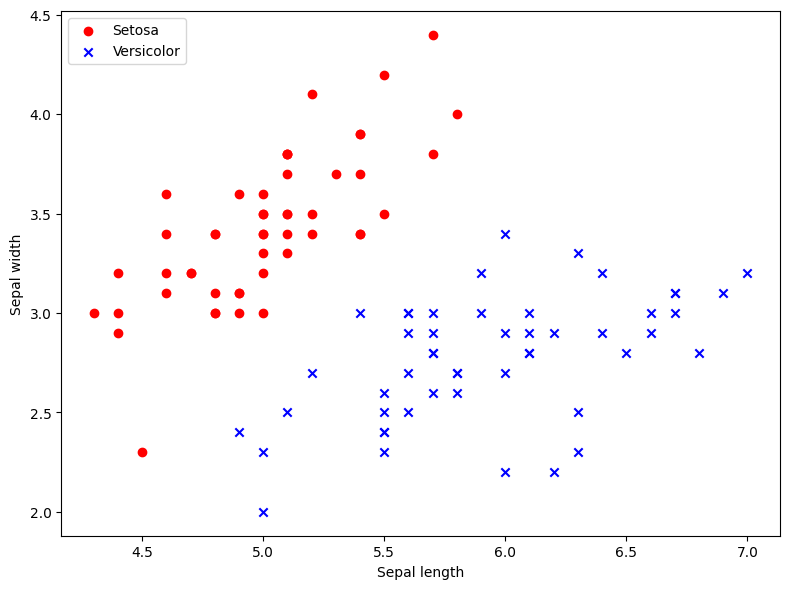

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_default = SVC(kernel='linear', C=1.0)
svm_default.fit(X_train, y_train)
accuracy_default = svm_default.score(X_test, y_test)
print("accuracy of C=1:", accuracy_default)

svm_c200 = SVC(kernel='linear', C=200)
svm_c200.fit(X_train, y_train)
accuracy_c200 = svm_c200.score(X_test, y_test)
print("accuracy of C=200:", accuracy_c200)

accuracy of C=1: 1.0
accuracy of C=200: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

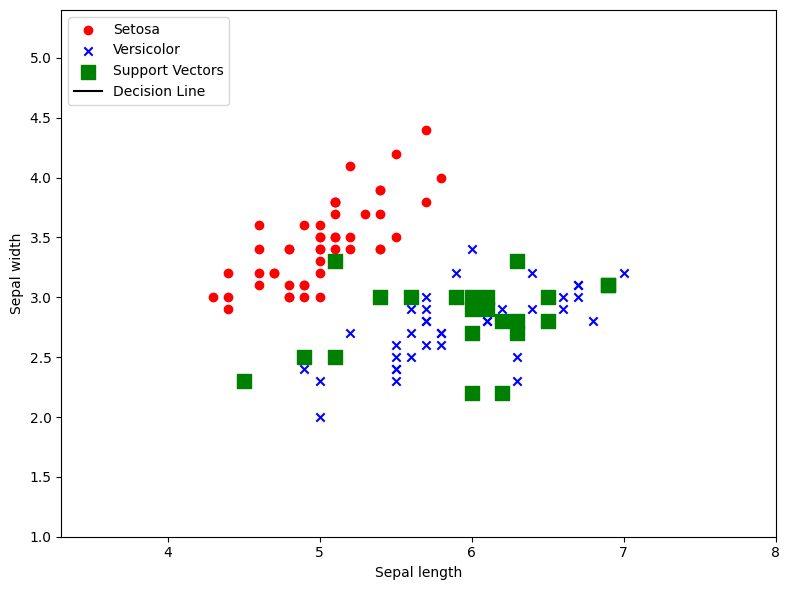

In [7]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Versicolor')

supvectors = SVMmodel.support_vectors_
plt.scatter(supvectors[:, 0], supvectors[:, 1], color='green', marker='s', s=100, label='Support Vectors')

W = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = (-W[0] * xx - b) / W[1]
plt.plot(xx, yy, 'k-', label='Decision Line')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='upper left')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

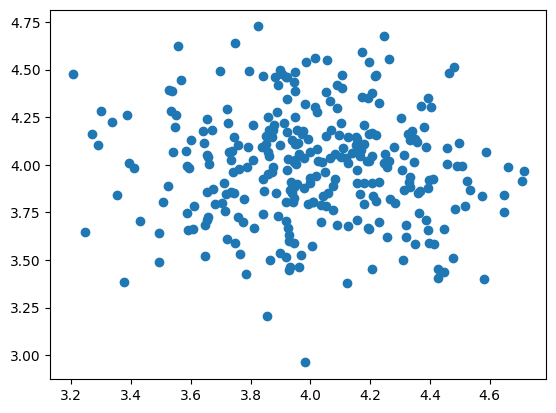

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

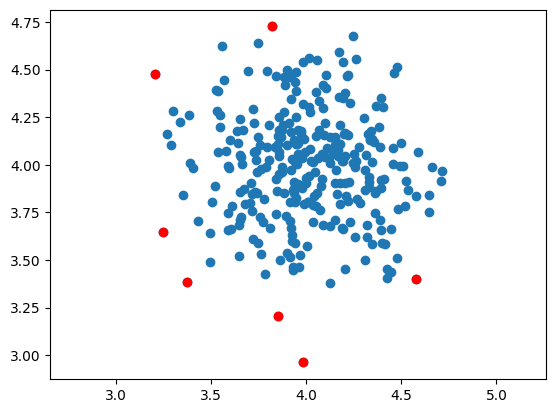

In [9]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

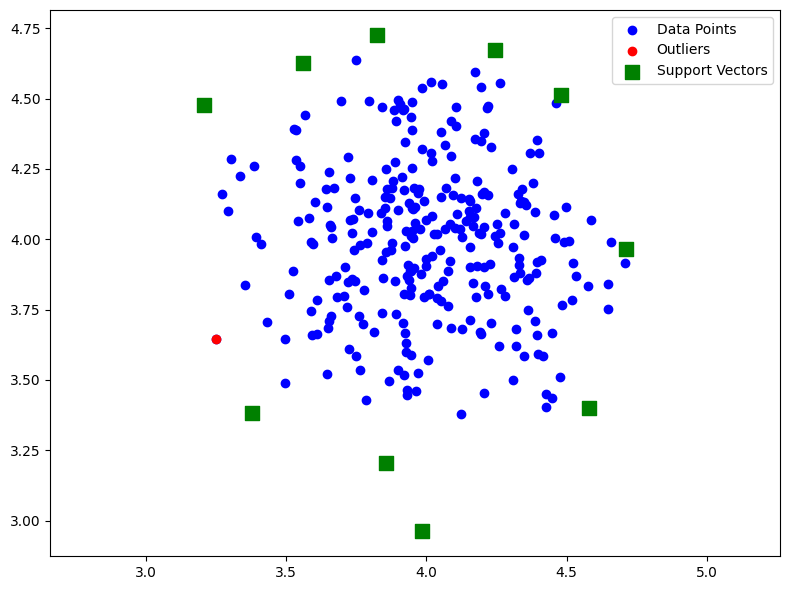

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], color='blue', label='Data Points')
plt.scatter(values[:, 0], values[:, 1], color='red', label='Outliers')

sup_vectors = SVMmodelOne.support_vectors_
plt.scatter(sup_vectors[:, 0], sup_vectors[:, 1], color='green', marker='s', s=100, label='Support Vectors')

plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


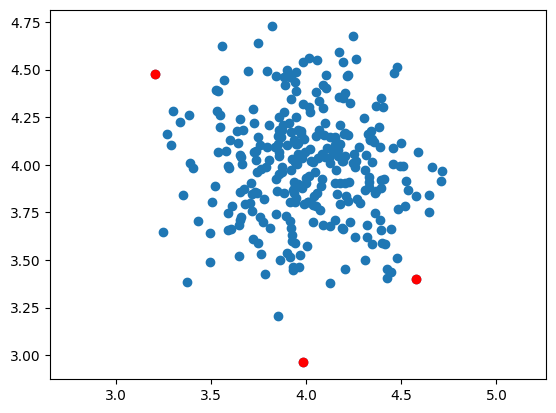

In [11]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()